In [1]:
!pip install pyod --user

In [3]:
!pip install seaborn 

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


In [21]:
import pandas as pd
import seaborn as sns
from pyod.models.knn import KNN
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
import sklearn.neighbors
from sklearn.neighbors import kneighbors_graph
from sklearn import preprocessing

# general 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# geography 
import geopandas
import plotly.express as px
import plotly.graph_objects as go
import json

#utility
from tqdm.notebook import tqdm
tqdm.pandas()
from IPython.display import HTML

# natural language
from thefuzz import process
from thefuzz import fuzz
from slugify import slugify

C:\Users\Cristina Gomez\anaconda3\envs\geo_env\lib\site-packages\thefuzz\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [48]:
df = pd.read_csv('data/suelos_preprocesado.csv')
df.head(2)

id  departamento municipio   cultivo fertilizantes    ph  materia_organica  \
0 NaN  cundinamarca     funza    uchuva     no indica  5.66          9.706679   
1 NaN  cundinamarca   bituima  citricos     no indica  8.08          3.417595   

    fosforo    azufre  acidez  ...  drenaje_regular  riego_aspersión  \
0  5.622299  4.345550     NaN  ...                0                0   
1  7.570468  6.832461     NaN  ...                0                0   

   riego_cañón  riego_goteo  riego_gravedad  riego_manguera  \
0            0            0               0               0   
1            0            0               0               0   

   riego_microaspersión  riego_no_cuenta_con_riego  riego_no_indica  \
0                     0                          0                1   
1                     0                          1                0   

   riego_por_inundación  
0                     0  
1                     0  

[2 rows x 58 columns]

In [50]:
new_df=df.copy()

In [86]:
Y=new_df[['ph', 'materia_organica', 'fosforo', 'calcio', 'magnesio', 'potasio','sodio', 'cice' ]].fillna(0)
X=new_df[['topografia_ligeramente_ondulado', 'topografia_moderadamente_ondulado',
       'topografia_no_indica', 'topografia_ondulado', 'topografia_pendiente','topografia_pendiente_fuerte', 'topografia_pendiente_leve', 
       'topografia_pendiente_moderada','topografia_plano', 'drenaje_bueno','drenaje_malo', 'drenaje_muy_buen_drenaje', 'drenaje_no_indica',
       'drenaje_regular', 'riego_aspersión', 'riego_cañón', 'riego_goteo','riego_gravedad', 'riego_manguera', 'riego_microaspersión','riego_no_cuenta_con_riego', 
       'riego_no_indica', 'riego_por_inundación']]

In [87]:
# Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(Y[['ph', 'materia_organica', 'fosforo', 'calcio', 'magnesio', 'potasio','sodio', 'cice']])
df_escalado = pd.DataFrame(df_escalado) 
df_escalado = df_escalado.rename(columns = {0: 'ph', 1: 'materia_organica', 2: 'fosforo' , 3: 'calcio', 4: 'magnesio', 5: 'potasio', 6: 'sodio', 7: 'cice'})

In [88]:
frames=[df_escalado,X]
final_df_anomaliasKNN=pd.concat(frames,axis=1)

In [109]:
#Forma 1, detecta outliers para un congunto de variables
clf = KNN(contamination=0.008)
modelo=clf.fit(final_df_anomaliasKNN)
y_pred = clf.predict(final_df_anomaliasKNN)
final_df_anomaliasKNN[y_pred == 1]

ph  materia_organica   fosforo    calcio  magnesio   potasio  \
121    0.308612          0.122411  0.018891  0.014970  0.025568  0.008166   
178    0.327751          0.072292  0.004313  0.015506  0.019449  0.003880   
593    0.440191          0.035213  0.003842  0.022416  0.019540  0.000937   
1664   0.610048          0.036952  0.008800  0.076560  0.202596  0.005899   
1665   0.641148          0.033016  0.004813  0.080860  0.217204  0.003115   
...         ...               ...       ...       ...       ...       ...   
44550  0.392344          0.049128  0.000642  0.001944  0.009165  0.001813   
44558  0.392344          0.083591  0.002520  0.025020  0.018202  0.003173   
44559  0.383971          0.043408  0.002308  0.023562  0.008161  0.001586   
44561  0.436603          0.111748  0.003200  0.024145  0.029916  0.004306   
44562  0.283493          0.212936  0.004128  0.005115  0.009835  0.002493   

          sodio      cice  topografia_ligeramente_ondulado  \
121    0.004590  0.054034                                0   
178    0.003259  0.051846                                0   
593    0.001948  0.026265                                0   
1664   0.005940  0.122257                                0   
1665   0.007506  0.128231                                0   
...         ...       ...                              ...   
44550  0.001948  0.017874                                0   
44558  0.001948  0.040575                                0   
44559  0.001948  0.046358                                0   
44561  0.001948  0.032152                                0   
44562  0.001948  0.049570                                0   

       topografia_moderadamente_ondulado  ...  drenaje_regular  \
121                                    0  ...                0   
178                                    0  ...                0   
593                                    0  ...                0   
1664                                   0  ...                0   
1665                                   0  ...                0   
...                                  ...  ...              ...   
44550                                  0  ...                0   
44558                                  0  ...                0   
44559                                  0  ...                1   
44561                                  0  ...                1   
44562                                  0  ...                0   

       riego_aspersión  riego_cañón  riego_goteo  riego_gravedad  \
121                  0            0            0               0   
178                  0            0            0               0   
593                  1            0            0               0   
1664                 0            0            0               0   
1665                 0            0            0               0   
...                ...          ...          ...             ...   
44550                0            0            0               0   
44558                0            0            0               0   
44559                0            0            0               0   
44561                0            0            0               0   
44562                0            0            0               0   

       riego_manguera  riego_microaspersión  riego_no_cuenta_con_riego  \
121                 0                     0                          1   
178                 0                     0                          1   
593                 0                     0                          0   
1664                0                     1                          0   
1665                0                     1                          0   
...               ...                   ...                        ...   
44550               0                     0                          1   
44558               0                     0                          0   
44559               0                     0                        

In [110]:
y_pred_df = pd.DataFrame(y_pred, columns = ['Prediction'])
y_pred_df['Prediction'].unique()
X1=final_df_anomaliasKNN[['ph', 'materia_organica', 'fosforo', 'calcio', 'magnesio', 'potasio','sodio', 'cice' ]]


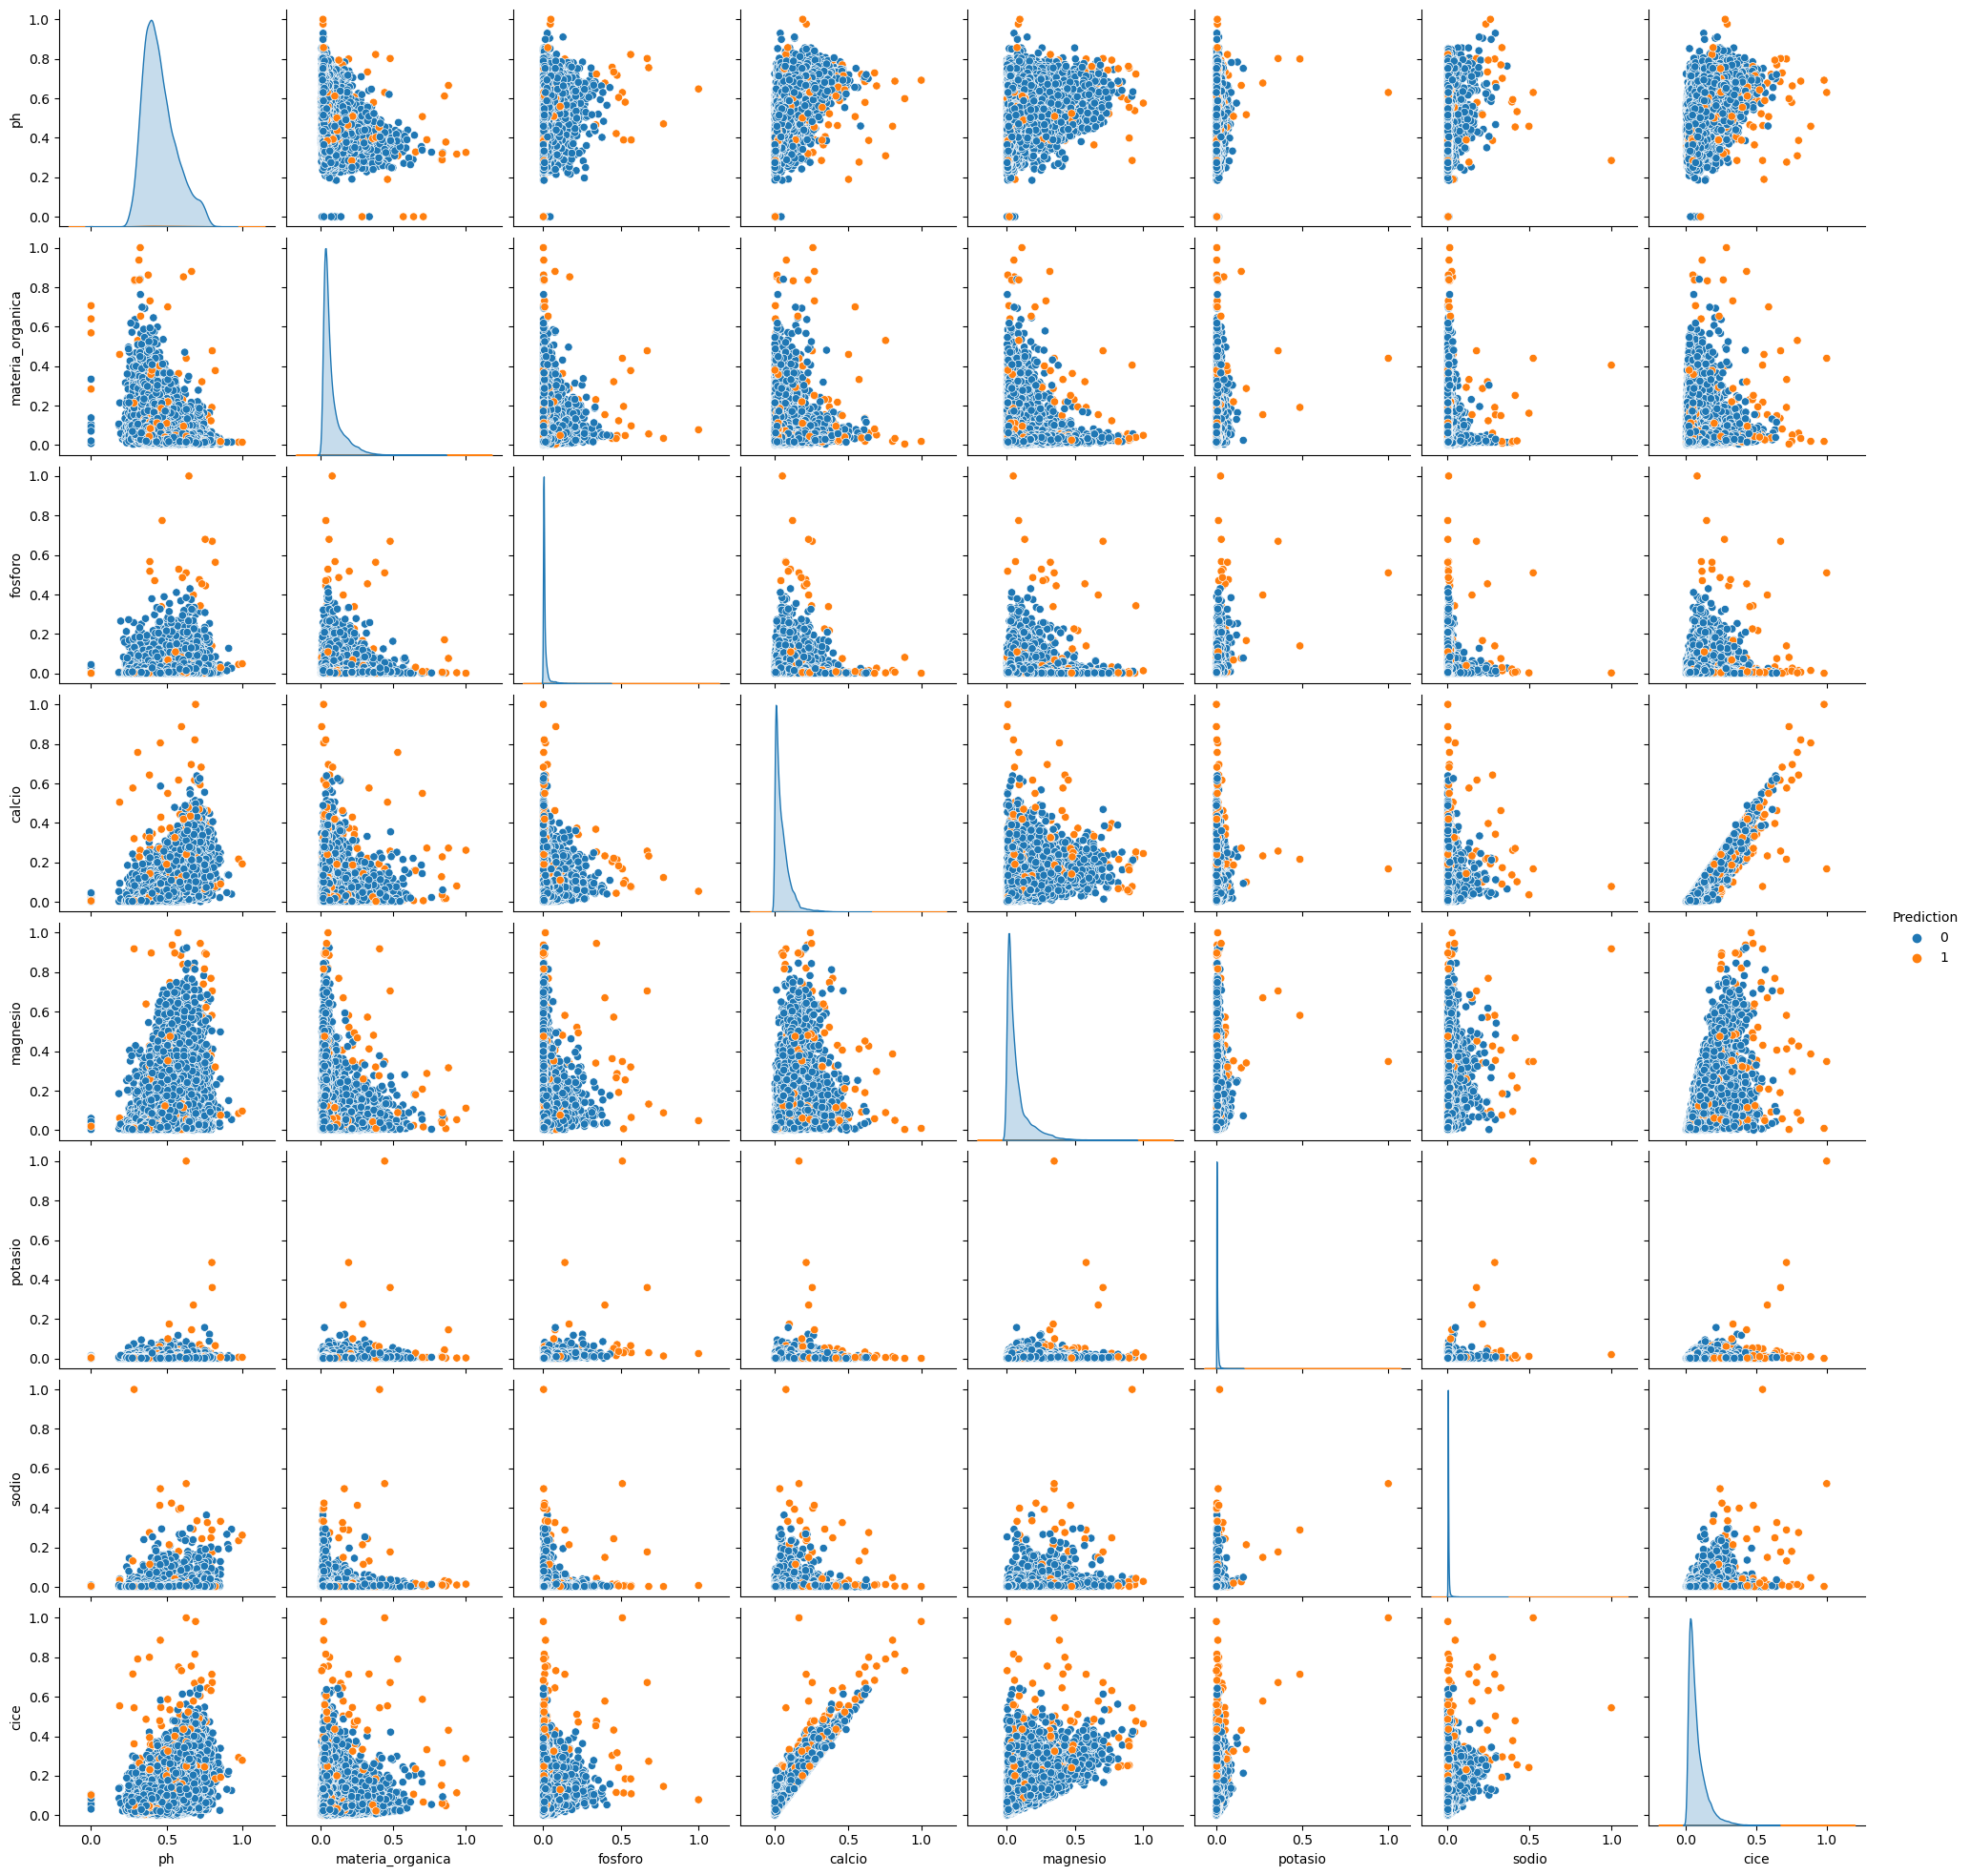

In [111]:
data = pd.concat([X1,y_pred_df], axis = 1)
# Grafico
sns.pairplot(data=data, hue="Prediction")

2. IQR (Inter Quartile Range

In [26]:
def detect_otliers(x): #funcion para detectar outliers para cada variable
    Q3 = Y[x].quantile(0.75)
    Q1 = Y[x].quantile(0.25)
    IQR = Q3 - Q1
    superior = Q3 + (1.5 * IQR)
    inferior = Q1 - (1.5 * IQR)
    out_sup = Y[Y[x] > superior].index
    out_inf = Y[Y[x] < inferior].index
    outliers = []
    for i in out_sup:
        outliers.append(i)
        for j in out_inf:
            outliers.append(j)
    
    size = len(outliers)
        
    return (f'Hay {size} valores atípicos en la variable {x}, y corresponden a los índices: {outliers}'), outliers



In [41]:
mensaje, indices=detect_otliers('materia_organica')

GRAFICA

In [22]:
with open("data/clean/Municipios_Colombia.geojson") as file:
    geo_municipios = json.load(file)
    
AGROSAVIA_df = pd.read_csv("data/clean/AGROSAVIA.csv",dtype=str)
DANE_df = pd.read_csv("data/clean/municipios_clean.csv",sep="\t",dtype=str)
DANE_df.set_index("MUN_ID",inplace=True)

In [42]:
AGROSAVIA_df['Materia orgánica (MO) %'] = AGROSAVIA_df['Materia orgánica (MO) %'].astype(float)

In [43]:
subset_anomalias=AGROSAVIA_df.loc[indices]

In [36]:
subset_anomalias.columns

Index(['numfila', 'Departamento', 'Municipio', 'Cultivo', 'Estado',
       'Tiempo Establecimiento', 'Topografia', 'Drenaje', 'Riego',
       'Fertilizantes aplicados', 'FechaAnalisis', 'pH agua:suelo 2,5:1,0',
       'Materia orgánica (MO) %', 'Fósforo (P) Bray II mg/kg',
       'Azufre (S) Fosfato monocalcico mg/kg', 'Acidez (Al+H) KCL cmol(+)/kg',
       'Aluminio (Al) intercambiable cmol(+)/kg',
       'Calcio (Ca) intercambiable cmol(+)/kg',
       'Magnesio (Mg) intercambiable cmol(+)/kg',
       'Potasio (K) intercambiable cmol(+)/kg',
       'Sodio (Na) intercambiable cmol(+)/kg',
       'capacidad de intercambio cationico (CICE) suma de bases cmol(+)/kg',
       'Conductividad el‚ctrica (CE) relacion 2,5:1,0 dS/m',
       'Hierro (Fe) disponible olsen mg/kg', 'Cobre (Cu) disponible mg/kg',
       'Manganeso (Mn) disponible Olsen mg/kg',
       'Zinc (Zn) disponible Olsen mg/kg', 'Boro (B) disponible mg/kg',
       'Hierro (Fe) disponible doble  cido mg/kg',
       'Cobre (Cu) 

In [44]:
col = 'Materia orgánica (MO) %'
calcio = subset_anomalias.groupby("MUN_ID")[col].mean().to_frame()
calcio["Nombre"] = DANE_df.Municipio
calcio.reset_index(inplace=True)

In [45]:
fig = px.choropleth_mapbox(
    organic,
    geojson=geo_municipios,
    locations="MUN_ID",
    color=col,
    color_continuous_scale="Viridis",
    hover_data = { # select the columns that will appear in the tooltip
        "MUN_ID":False,
        col:True,
        "Nombre":True
    },
    center = {"lat":4,"lon":-15*5}, # Colombia is GMT-5, each hour is 15°
    zoom=5,
    mapbox_style="carto-positron",
    height=800,
    opacity=1,
    range_color = calcio[col].quantile([0,0.98]).tolist()
)
fig.update_traces(marker_line_width=0) # clear contours
fig.show()